In [9]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

import hydracv.utils.utils as utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
PROD = 0.227

In [16]:
def plot_curve(filename, magnificent, start=0, end=-1, filtered=False, thres=0.2, size=50):
    filename = "./data/length/" + filename + ".csv"
    len_pxl = PROD / magnificent # Length per pixel
    # Load length data
    plt.figure(figsize=(20,3))
    lengths = pd.read_csv(filename).values[start:end]
    lengths = [x*len_pxl for x in lengths]
    
    if filtered:
        lengths = utils.filter_abnormal(lengths, size, thres)
    
    plt.plot(lengths)
    plt.xlabel("frame #")
    plt.ylabel("length[mm]")
    plt.show()

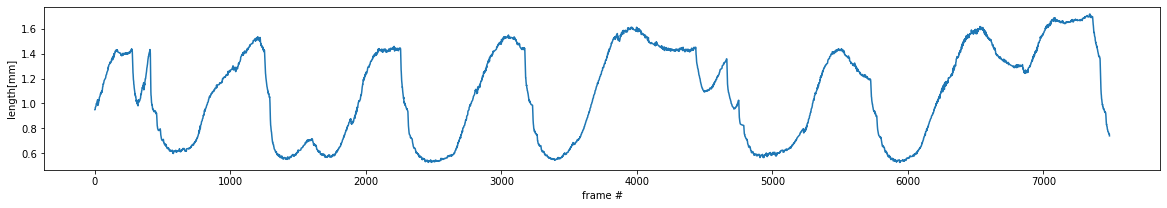

In [9]:
plot_curve("lengths_Control-EGCaMP_exp1_a1_30x10fps", 30)

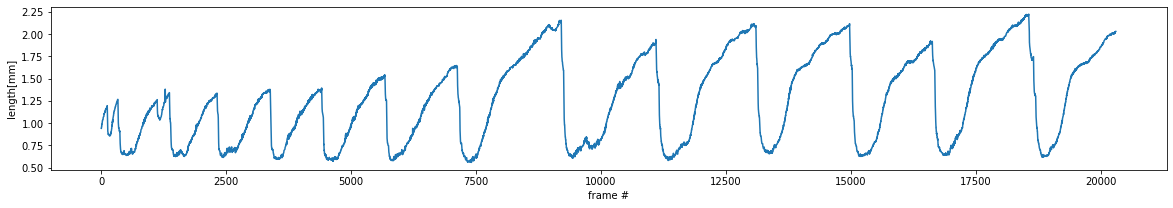

In [19]:
plot_curve("lengths_Control-EGCaMP_exp1_a2_25x10fps_30mins", 25, filtered=True, thres=0.2, size=100)

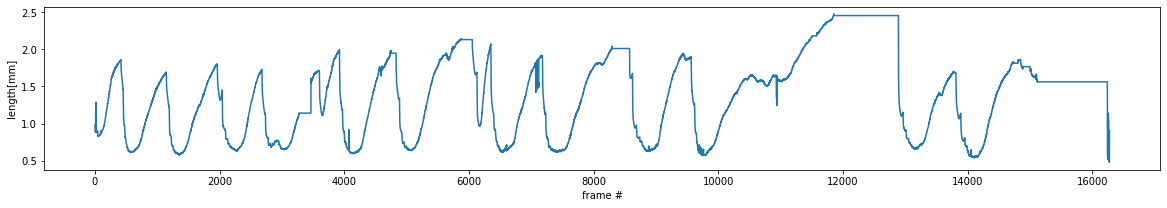

In [59]:
plot_curve("lengths_EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6", 35)

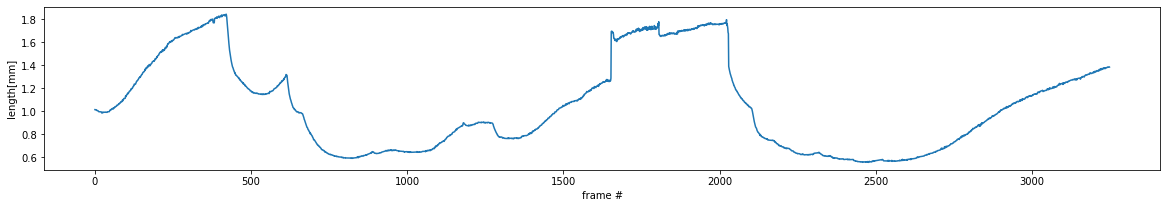

In [5]:
plot_curve("lengths_NGCaMP6_50X_20fps_M1_001_R1", 50)

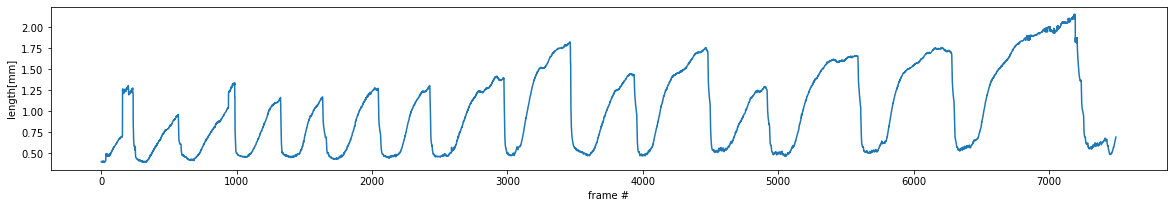

In [29]:
plot_curve("lengths_Pre_Bisect_40x_4fps_ex4_ROIs", 40, filtered=True, thres=0.1) # , 2045, 2800)

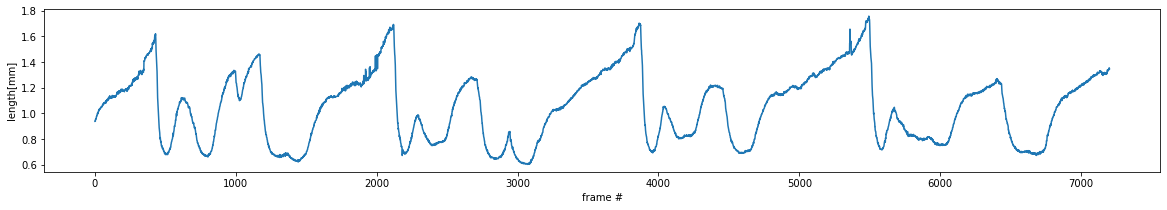

In [67]:
plot_curve("lengths_0hr_Control_ngcampmov_30x4fps_50%intensity_exp3_a3", 30)

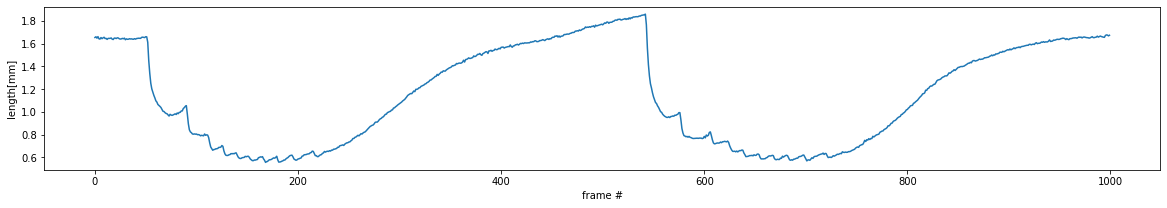

In [33]:
plot_curve("lengths_Pre_Bisect_40x_4fps_ex3", 40, filtered=True)

In [9]:
dur_body_waves = pd.read_csv("./data/manual_labels/body_column_waves.csv", header=None, dtype=int).values
dur_body_waves.shape

(7, 2)

In [10]:
dur_body_waves

array([[1106, 1252],
       [2026, 2256],
       [2932, 3173],
       [3868, 4435],
       [5356, 5726],
       [6430, 6921],
       [6921, 7351]])

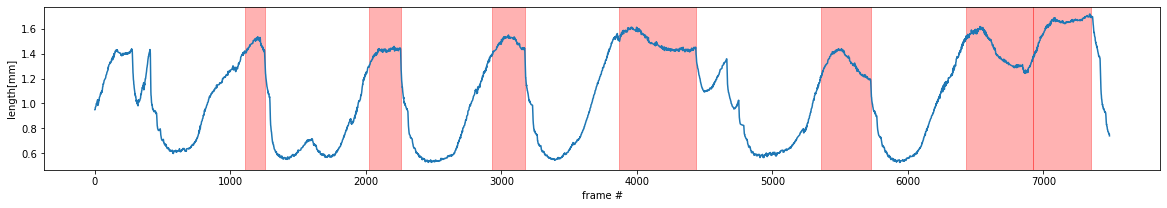

In [11]:
filename = "./data/length/" + "lengths_Control-EGCaMP_exp1_a1_30x10fps_5%" + ".csv"
len_pxl = PROD / 30 # Length per pixel
# Load length data
plt.figure(figsize=(20,3))
lengths = pd.read_csv(filename).values
lengths = [x*len_pxl for x in lengths]
plt.plot(lengths)

for dur in dur_body_waves:
    rect = patches.Rectangle((dur[0], 0), dur[1]-dur[0], 1.8, alpha=0.3, color='r')
    plt.gca().add_patch(rect)
   
plt.xlabel("frame #")
plt.ylabel("length[mm]")
plt.show()